# Imports

In [1]:
import plotnine as gg
gg.theme_set(gg.theme_classic)
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt

from Functions import replace_nans, get_info_from_fullID, add_meta_column

# Directories

In [2]:
base_dir = 'C:/Users/maria/MEGAsync/SLCN'
param_dir = os.path.join(base_dir, 'PShumanData/fitting/mice/')
plot_save_dir = os.path.join(base_dir, 'models/plots/')

# Plot model fits

In [3]:
model_fits = pd.read_csv(os.path.join(param_dir, 'plots', 'modelwise_LLS.csv'))
model_fits = model_fits.sort_values(by=['WAIC']).reset_index(drop=True)
model_fits

,model_name,slope_variable,n_subj,WAIC,NLL,AIC
0,Bbspr,age_z,441,198209.156250,97340.578125,198209.156250
1,RLabcpnxd,age_z,441,199978.015625,96902.007812,199978.015625
2,RLabnp2d,age_z,441,200209.390625,97458.695312,200209.390625
3,Bbpr,age_z,441,201580.562500,99467.281250,201580.562500
4,RLabnp2,age_z,441,201951.687500,98770.843750,201951.687500
5,RLabcpd,age_z,441,204945.421875,100267.710938,204945.421875
6,RLabcpnd,age_z,441,204991.828125,99849.914062,204991.828125
7,RLabcd,age_z,441,210410.875000,103441.437500,210410.875000
8,Bbp,age_z,441,213123.515625,105679.757812,213123.515625
9,RLabd,age_z,441,220823.843750,109088.921875,220823.843750


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/WAICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


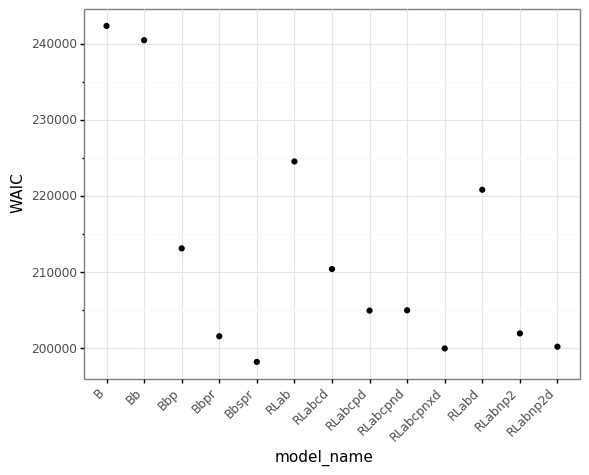

<ggplot: (139303450260)>

In [4]:
g = (gg.ggplot(model_fits, gg.aes('model_name', 'WAIC'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
)
g.save(os.path.join(plot_save_dir, 'WAICs.png'))
g

In [5]:
# winning_model_name = model_fits[model_fits.WAIC == np.min(model_fits.WAIC)].model_name.values[0]
winning_model_names = ['Bbspr', 'RLabcpnxd']

In [6]:
fits = pd.read_csv(os.path.join(param_dir, 'plots', 'subjwise_LLs.csv'))
fits = fits.drop(columns=['slope_variable', 'n_subj'])
fits

,model_name,n_params,1404012,1404112,1404212,1404312,1404412,1404512,1404612,1404712,...,1307921,1308021,1308121,1308221,1308321,1308521,1308621,1308821,1308921,1309021
0,Bbpr,3,-179.044937,-246.233154,-272.551941,-170.055161,-206.303986,-224.175369,-211.782455,-184.107864,...,-160.980789,-248.316467,-192.486618,-204.300858,-251.533997,-205.608536,-202.348862,-196.624786,-191.656067,-182.175583
1,Bbp,2,-186.931244,-265.237671,-296.356140,-210.346817,-213.423981,-240.261185,-237.775681,-200.148270,...,-172.986969,-272.413208,-208.253342,-224.581772,-253.064423,-233.403229,-218.973801,-221.516937,-205.833466,-200.176224
2,Bbspr,4,-177.458374,-243.053085,-281.218140,-168.632568,-202.039566,-228.628265,-207.171814,-178.566528,...,-158.803467,-249.304703,-188.766495,-199.423462,-243.207718,-201.661987,-201.484314,-195.043320,-177.473984,-171.475555
3,Bb,1,-270.396240,-336.897705,-333.587250,-250.425461,-242.417831,-250.872437,-254.403915,-231.669418,...,-239.102173,-294.276001,-237.312729,-242.318329,-265.999969,-251.830231,-245.618057,-238.360214,-214.517593,-197.162247
4,B,0,-263.531647,-347.559540,-358.032867,-236.662109,-220.353943,-250.690704,-246.013626,-227.652283,...,-229.291473,-290.548553,-226.521332,-231.385071,-261.702393,-238.873337,-233.356308,-231.040405,-204.012955,-190.961258
5,RLabcd,4,-219.873947,-274.442322,-296.426117,-175.983856,-198.276337,-232.279144,-229.671127,-201.733627,...,-173.239578,-272.174805,-195.573013,-200.761215,-249.100342,-213.686752,-204.917633,-201.778442,-175.665115,-178.991699
6,RLabcpd,5,-194.481171,-250.935257,-284.006714,-173.885498,-208.577591,-230.141327,-222.522141,-196.394485,...,-166.344696,-266.294739,-193.592453,-196.669708,-252.370255,-213.172333,-203.193054,-205.119324,-169.556290,-171.997665
7,RLabcpnd,6,-191.891449,-250.068710,-287.278168,-172.411423,-207.537338,-229.682816,-219.936783,-195.706680,...,-165.988815,-262.268158,-193.511185,-196.806900,-242.470978,-212.295685,-203.131714,-203.777328,-164.092300,-176.303635
8,RLabcpnxd,7,-178.495331,-238.020523,-259.629486,-168.140976,-197.926880,-215.259903,-213.671036,-183.582932,...,-157.393570,-251.021378,-188.710892,-193.770401,-240.097107,-207.376923,-201.148911,-189.539017,-171.550735,-158.013626
9,RLabd,3,-231.364029,-316.169373,-300.063751,-184.544373,-206.720520,-242.181412,-234.464676,-204.021423,...,-192.605164,-275.820831,-221.775543,-227.330933,-275.494415,-226.055954,-210.127411,-242.923660,-196.560928,-196.209183


In [7]:
# Melt
fits_ = pd.melt(fits, id_vars=['model_name', 'n_params'], var_name='fullID', value_name='LL')

# Add BIC and AIC
n_trials = 725
for row in range(len(fits_)):
    fits_.loc[row, 'AIC'] = 2 * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']
    fits_.loc[row, 'BIC'] = np.log(n_trials) * fits_.loc[row, 'n_params'] - 2 * fits_.loc[row, 'LL']

# Add animal id, age, gender
keys = get_info_from_fullID(fits_.fullID[0]).keys()
for row in range(len(fits_)):
    for key in keys:
        fits_.loc[row, key] = get_info_from_fullID(fits_.fullID[row])[key]
fits_

,model_name,n_params,fullID,LL,AIC,BIC,animal,age,gender,agegroup
0,Bbpr,3,1404012,-179.044937,364.089874,377.848389,14.0,40.0,Male,Juvenile
1,Bbp,2,1404012,-186.931244,377.862488,387.034831,14.0,40.0,Male,Juvenile
2,Bbspr,4,1404012,-177.458374,362.916748,381.261435,14.0,40.0,Male,Juvenile
3,Bb,1,1404012,-270.396240,542.792480,547.378652,14.0,40.0,Male,Juvenile
4,B,0,1404012,-263.531647,527.063293,527.063293,14.0,40.0,Male,Juvenile
...,...,...,...,...,...,...,...,...,...,...
5728,RLabcpnxd,7,1309021,-158.013626,330.027252,362.130454,13.0,90.0,Female,Adult
5729,RLabd,3,1309021,-196.209183,398.418365,412.176880,13.0,90.0,Female,Adult
5730,RLabnp2d,6,1309021,-157.664307,327.328613,354.845643,13.0,90.0,Female,Adult
5731,RLabnp2,5,1309021,-170.809143,351.618286,374.549144,13.0,90.0,Female,Adult


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/LLs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/BICs.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site

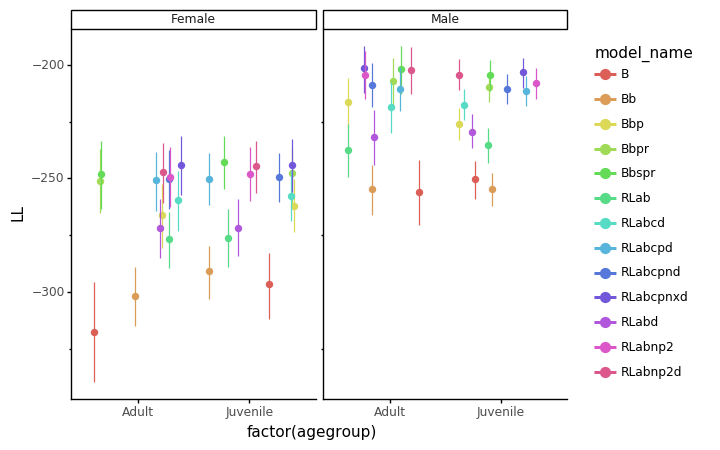

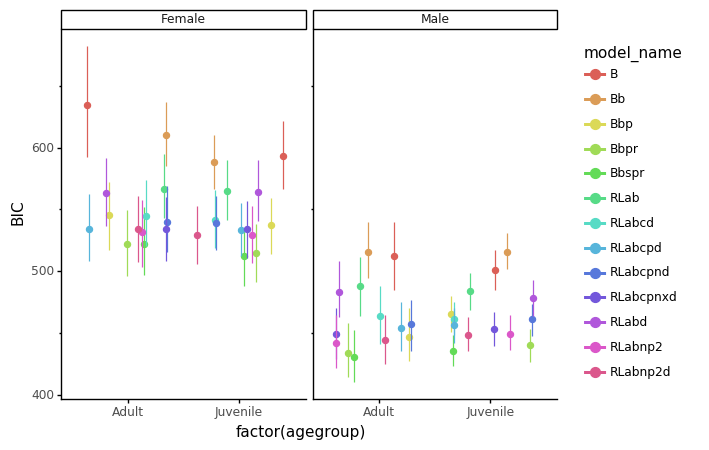

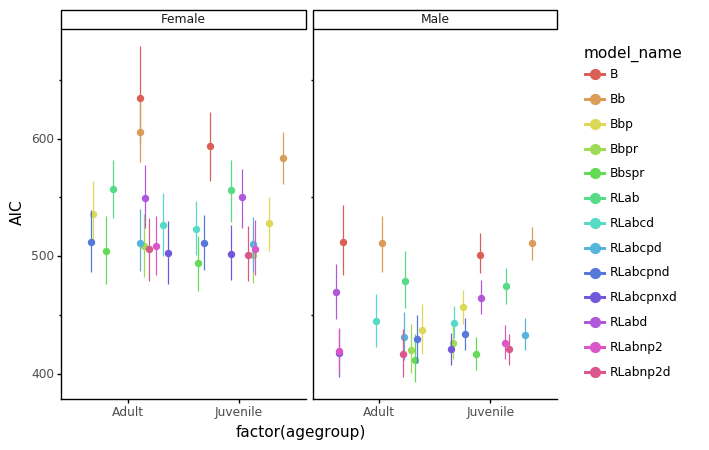

In [8]:
for yax in ['LL', 'BIC', 'AIC']:
    g = (gg.ggplot(fits_, gg.aes('factor(agegroup)', yax, color='model_name'))
     + gg.stat_summary(position='jitter')
     + gg.facet_wrap('~ gender')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, '{}s.png'.format(yax)))

In [9]:
# Get AICs
AICs = fits_.pivot_table(columns='model_name', index=['fullID', 'gender', 'agegroup'], values='AIC')

for col in AICs.columns:
    if 'RL' in col:
        ref_col = 'RLabcpnxd'
    elif 'B' in col:
        ref_col = 'Bbspr'
    if 'WSLS' in col:
        ref_col = 'Bbspr'
    AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]
ref_col, col = winning_model_names
AICs['{}_minus_{}'.format(col, ref_col)] = AICs[col] - AICs[ref_col]

# AIC differences
AICs_rel = AICs.drop(columns=[col for col in AICs.columns if
                              (not 'minus' in col) and (not col=='gender') and (not col=='agegroup')])
AICs_rel = AICs_rel.reset_index()
AICs_rel = AICs_rel.melt(id_vars=['fullID', 'gender', 'agegroup'], value_name='AIC')
AICs_rel

,fullID,gender,agegroup,model_name,AIC
0,1007421,Female,Adult,B_minus_Bbspr,454.298279
1,1007521,Female,Adult,B_minus_Bbspr,272.092438
2,1007621,Female,Adult,B_minus_Bbspr,239.632324
3,1007721,Female,Adult,B_minus_Bbspr,134.209381
4,1007821,Female,Adult,B_minus_Bbspr,157.481964
...,...,...,...,...,...
6169,908421,Female,Adult,RLabcpnxd_minus_Bbspr,10.201935
6170,908521,Female,Adult,RLabcpnxd_minus_Bbspr,15.285278
6171,908621,Female,Adult,RLabcpnxd_minus_Bbspr,5.821686
6172,908721,Female,Adult,RLabcpnxd_minus_Bbspr,37.735657


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 5 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/RelativeAICs2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


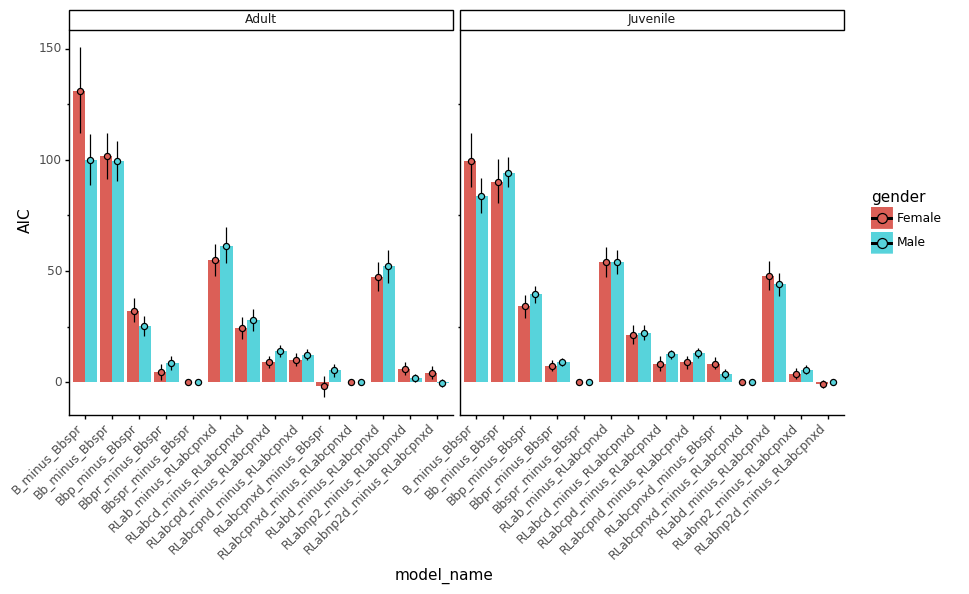

In [10]:
# Plot AIC differences
gg.options.figure_size = (10, 5)
g = (gg.ggplot(AICs_rel, gg.aes('model_name', 'AIC', fill='gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(position=gg.position_dodge(width=0.75))
#  + gg.geom_point()
 + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
 + gg.facet_grid('~ agegroup')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'RelativeAICs2.png'))

# Load fitted parameters

In [11]:
# Load
all_params = pd.DataFrame()
for file in os.listdir(param_dir):
    if ('csv' in file) and ('nll' not in file):
        new_params = pd.read_csv(os.path.join(param_dir, file))
        model_name = list(new_params.model)[0][:1]
        all_params = all_params.append(new_params)

# Preprocess        
all_params['age_group'] = ['adult' if treatment == 1 else 'juvenile' for treatment in all_params.treatment]
all_params = all_params.drop(columns=['PDS', 'T1', 'age_z', 'treatment', 'cnalpha_rew', 'p_noisy', 'slope_variable'])
all_params.beta /= 15
all_params['age_group'] = pd.Categorical(all_params['age_group'], ordered=True, categories=('juvenile', 'adult'))
all_params

,Gender,PreciseYrs,alpha,animal,beta,bias,calpha,cnalpha,fullID,model,nalpha,p_reward,p_switch,persev,sID,session,age_group
0,Male,40,NaN,14,0.146604,0.0,NaN,NaN,1404012,Bbpr,NaN,0.948609,0.050816,0.511825,1404012,0,juvenile
1,Male,41,NaN,14,0.112804,0.0,NaN,NaN,1404112,Bbpr,NaN,0.970130,0.050816,0.545560,1404112,1,juvenile
2,Male,42,NaN,14,0.114591,0.0,NaN,NaN,1404212,Bbpr,NaN,0.983036,0.050816,0.453577,1404212,2,juvenile
3,Male,43,NaN,14,0.496522,0.0,NaN,NaN,1404312,Bbpr,NaN,0.993923,0.050816,0.439123,1404312,3,juvenile
4,Male,44,NaN,14,0.170417,0.0,NaN,NaN,1404412,Bbpr,NaN,0.968005,0.050816,0.371627,1404412,4,juvenile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Female,85,0.816000,13,0.282970,0.0,0.0,0.0,1308521,RLab,0.816000,NaN,NaN,0.000000,1308521,11,adult
436,Female,86,0.757364,13,0.333719,0.0,0.0,0.0,1308621,RLab,0.757364,NaN,NaN,0.000000,1308621,12,adult
437,Female,88,0.667046,13,0.236336,0.0,0.0,0.0,1308821,RLab,0.667046,NaN,NaN,0.000000,1308821,13,adult
438,Female,89,0.787941,13,0.344081,0.0,0.0,0.0,1308921,RLab,0.787941,NaN,NaN,0.000000,1308921,14,adult


In [12]:
animal_colnames = ['Gender', 'PreciseYrs', 'animal', 'fullID', 'sID', 'session', 'age_group']
all_params_long = pd.melt(all_params, id_vars=animal_colnames + ['model'],
                          var_name='param_name', value_name='param_value')
all_params_long = all_params_long[all_params_long.param_value != 0]
all_params_long = add_meta_column(all_params_long)
all_params_long

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]
C:\Users\maria\MEGAsync\SLCN\models\Functions.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['meta'] = pd.Categorical(dat['meta'], ordered=True, categories=('0-2', '3-9', '10-12'))


,Gender,PreciseYrs,animal,fullID,sID,session,age_group,model,param_name,param_value,meta
0,Male,40,14,1404012,1404012,0,juvenile,Bbpr,alpha,NaN,0-2
1,Male,41,14,1404112,1404112,1,juvenile,Bbpr,alpha,NaN,0-2
2,Male,42,14,1404212,1404212,2,juvenile,Bbpr,alpha,NaN,0-2
3,Male,43,14,1404312,1404312,3,juvenile,Bbpr,alpha,NaN,3-9
4,Male,44,14,1404412,1404412,4,juvenile,Bbpr,alpha,NaN,3-9
...,...,...,...,...,...,...,...,...,...,...,...
51032,Female,81,13,1308121,1308121,8,adult,RLabnp2,persev,0.488581,3-9
51033,Female,82,13,1308221,1308221,9,adult,RLabnp2,persev,0.417358,3-9
51034,Female,83,13,1308321,1308321,10,adult,RLabnp2,persev,0.323751,10-12
51035,Female,85,13,1308521,1308521,11,adult,RLabnp2,persev,0.512062,10-12


# Plotting functions

In [13]:
def subset_model_data(data, model_name):
    
    win_mod_sub = data.model == model_name
    not_nan_sub = np.invert(np.isnan(data.loc[win_mod_sub, 'param_value']))
    sub_dat = data[np.logical_and(win_mod_sub, not_nan_sub)]

    return sub_dat

# # Example use
# plotted_model_name = winning_model_names[0]
# sub_dat = subset_model_data(all_params_long, plotted_model_name)

In [14]:
def plot_session_params(data, winning_model_name):

    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('session', 'param_value', color='age_group'))
     + gg.geom_point(alpha=0.5)
     + gg.geom_smooth()
     + gg.coord_cartesian(xlim=(0, 12))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(y='')
     + gg.facet_grid('Gender ~ param_name')
    )
    g.draw()
    save_dir = os.path.join(plot_save_dir, 'ParamsSession_{}.png'.format(winning_model_name))
    print("Saving to {}".format(save_dir))
    g.save(save_dir)
    
# # Example use
# gg.options.figure_size = (5, 4)
# plot_session_params(sub_dat, plotted_model_name)

In [15]:
def plot_meta_params(data, winning_model_name):

    # Plot
    ## Males only
    sub_dat_male = data[data.Gender == 'Male']
    g_male = (gg.ggplot(sub_dat_male, gg.aes('meta', 'param_value', fill='age_group'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge(width=0.9))
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.9))
     + gg.coord_cartesian(ylim=(0, 1))  # adapt for BF (0, 0.8) vs RL (0, 1)
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.labs(x='', y='')
     + gg.facet_grid('age_group ~ param_name')
    )
    g_male.draw()
    g_male.save(os.path.join(plot_save_dir, 'ParamsMetaMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_female = g_male
    g_female.data = data[data.Gender == 'Female']
    g_female.draw()
    g_female.save(os.path.join(plot_save_dir, 'ParamsMetaFemale_{}.png'.format(winning_model_name)))
    
# # Example use
# plot_meta_params(sub_dat, plotted_model_name)

In [16]:
def plot_agegroup_params(data, winning_model_name):

    ## Males only
    sub_dat_male = data[data.Gender == 'Male']
    g_m = (gg.ggplot(sub_dat_male, gg.aes('age_group', 'param_value', fill='age_group'))
     + gg.stat_summary(geom='bar', position=gg.position_dodge)
     + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1),
                legend_position='none')
     + gg.coord_cartesian(ylim=(-0.1, 1))
     + gg.labs(x='', y='')
     + gg.facet_grid('meta ~ param_name')
    )
    g_m.draw()
    g_m.save(os.path.join(plot_save_dir, 'ParamsAgegroupMale_{}.png'.format(winning_model_name)))
    
    ## Females only
    g_f = g_m
    g_f.data = data[data.Gender == 'Female']
    g_f.draw()
    g_f.save(os.path.join(plot_save_dir, 'ParamsAgegroupFemale_{}.png'.format(winning_model_name)))
    
# # Example use
# plot_agegroup_params(sub_dat, plotted_model_name)

In [17]:
def plot_age_params(data, winning_model_name, file_name_sub=''):

    g = (gg.ggplot(data, gg.aes('PreciseYrs', 'param_value', color='Gender'))
     + gg.geom_point()
     + gg.geom_smooth(color='black')
     + gg.facet_grid('Gender ~ param_name')
     + gg.labs(x='Age', y='')
    )
    g.draw()
    g.save(os.path.join(plot_save_dir, 'ParamsAge_{}{}.png'.format(winning_model_name, file_name_sub)))
    
# # Example use
# plot_age_params(sub_dat, plotted_model_name)

## Plot winning models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsMetaMale_Bbspr.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/ParamsMetaFemale_Bbspr.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacon

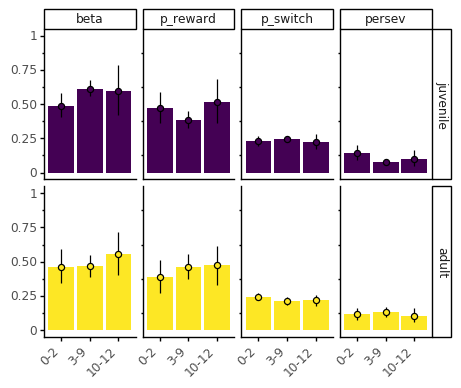

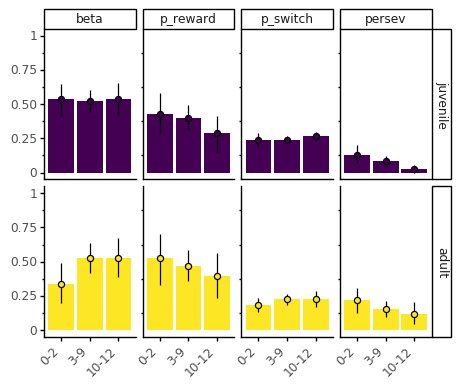

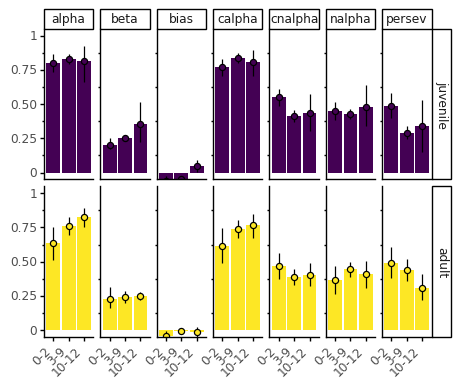

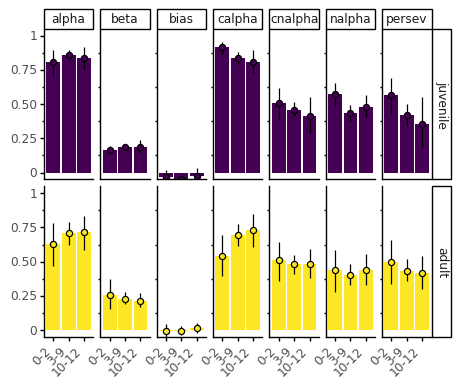

In [29]:
for plotted_model_name in winning_model_names:

    # Subset model data
    win_mod_sub = all_params_long.model == plotted_model_name
    not_nan_sub = np.invert(np.isnan(all_params_long.loc[win_mod_sub, 'param_value']))
    sub_dat = all_params_long[np.logical_and(win_mod_sub, not_nan_sub)]
    
    # Plot
    gg.options.figure_size = (5, 4)
    plot_session_params(sub_dat, plotted_model_name)
    plot_meta_params(sub_dat, plotted_model_name)
    plot_agegroup_params(sub_dat, plotted_model_name)
    plot_age_params(sub_dat, plotted_model_name)

# Parameter correlations between models

In [19]:
BF_params = all_params[all_params.model == winning_model_names[0]]
RL_params = all_params[all_params.model == winning_model_names[1]]
RL_params

winning_params = RL_params.drop(columns=['model']).merge(
    BF_params.drop(columns=['model']), on=animal_colnames, suffixes=['_RL', '_BF'])
winning_params = winning_params.drop(columns=[
    'alpha_BF', 'calpha_BF', 'cnalpha_BF', 'nalpha_BF', 'p_reward_RL', 'p_switch_RL', 'bias_BF'])
winning_params

,Gender,PreciseYrs,alpha_RL,animal,beta_RL,bias_RL,calpha_RL,cnalpha_RL,fullID,nalpha_RL,persev_RL,sID,session,age_group,beta_BF,p_reward_BF,p_switch_BF,persev_BF
0,Male,40,0.751247,14,0.157878,0.002264,0.751247,0.509905,1404012,0.509905,0.907990,1404012,0,juvenile,0.267297,0.685551,0.204026,0.241626
1,Male,41,0.988616,14,0.133255,-0.154103,0.993393,0.770160,1404112,0.289909,0.770204,1404112,1,juvenile,0.284669,0.597591,0.268413,0.165448
2,Male,42,0.966955,14,0.120701,-0.276138,0.966955,0.706989,1404212,0.706989,0.810461,1404212,2,juvenile,0.096566,0.998620,0.003748,0.507703
3,Male,43,0.762141,14,0.370794,0.009864,0.762142,0.851672,1404312,0.851672,0.924486,1404312,3,juvenile,0.986721,0.684521,0.349154,0.084473
4,Male,44,0.633866,14,0.320660,-0.021943,0.325686,0.653722,1404412,0.136698,0.212858,1404412,4,juvenile,0.453864,0.537982,0.263197,0.077187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Female,85,0.991203,13,0.178621,0.019685,0.991203,0.549578,1308521,0.549578,0.509476,1308521,11,adult,0.884973,0.186249,0.341134,0.006532
436,Female,86,0.836859,13,0.257068,0.025110,0.688061,0.734937,1308621,0.083437,0.193373,1308621,12,adult,0.152023,0.995762,0.007388,0.434482
437,Female,88,0.884619,13,0.212633,-0.191590,0.884618,0.434098,1308821,0.434098,0.355101,1308821,13,adult,0.577080,0.359999,0.284046,0.037910
438,Female,89,0.177444,13,0.991219,-0.034925,0.995292,0.017618,1308921,0.762593,0.004051,1308921,14,adult,0.789989,0.383538,0.308794,0.024830


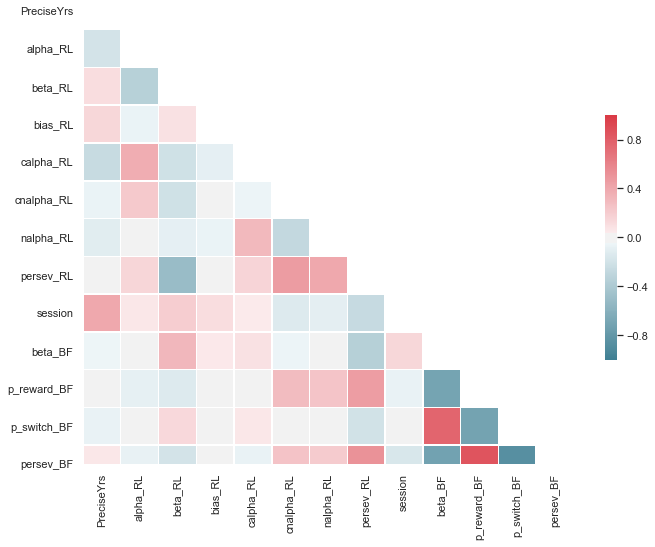

In [20]:
# Compute the correlation matrix
corr = winning_params.drop(columns=['animal', 'fullID', 'sID']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig(os.path.join(plot_save_dir, 'CorrelationMatrix.png'))

## Stats on parameter differences

In [21]:
import statsmodels.formula.api as smf

all_models = pd.DataFrame()

for param in ['alpha_RL', 'beta_RL', 'bias_RL', 'calpha_RL', 'cnalpha_RL', 'nalpha_RL', 'persev_RL',
              'beta_BF', 'p_reward_BF', 'p_switch_BF', 'persev_BF']:
    mod = smf.ols(
        formula='{} ~ (session + Gender + age_group) * (session + Gender + age_group)'.format(param),
        data=winning_params).fit()
    
    p = pd.DataFrame(mod.pvalues, columns=['p'])
    c = pd.DataFrame(mod.params, columns=['coef'])
    c['param'] = param

    mod_dat = p.merge(c, left_index=True, right_index=True)
    mod_dat
    
    all_models = all_models.append(mod_dat)

all_models['sig'] = ['sig' if p > 0.05 else 'ns' for p in all_models.p]
all_models = all_models.reset_index()
all_models = all_models.replace({
#     'Gender[T.Male]': 'Sex', 'PreciseYrs': 'Age', 'PreciseYrs:Gender[T.Male]': 'Interaction'
#     'Gender[T.Male]': 'Sex', 'session:Gender[T.Male]': 'Interaction'
    'Gender[T.Male]': 'Sex', 'session': 'Session', 'age_group[T.adult]': 'Agegroup',
    'Gender[T.Male]:age_group[T.adult]': 'Sex:Agegroup',
    'session:Gender[T.Male]': 'Session:Sex',
    'session:age_group[T.adult]': 'Session:Agegroup'
})
all_models = all_models.rename(columns={'index': 'effect'})
all_models.effect = pd.Categorical(all_models.effect, ordered=True,
#                                    categories=['Age', 'Sex', 'Interaction', 'Intercept']
#                                    categories=['session', 'Sex', 'Interaction', 'Intercept']
                                   categories=['Session', 'Agegroup', 'Sex',
                                               'Session:Agegroup', 'Session:Sex', 'Sex:Agegroup',
                                               'Intercept']
                                  )
all_models

,effect,p,coef,param,sig
0,Intercept,3.261797e-78,0.849302,alpha_RL,ns
1,Sex,3.219341e-01,-0.041478,alpha_RL,sig
2,Agegroup,1.402963e-05,-0.211508,alpha_RL,ns
3,Sex:Agegroup,1.728420e-01,0.062466,alpha_RL,sig
4,Session,7.889302e-01,-0.001500,alpha_RL,sig
...,...,...,...,...,...
72,Agegroup,2.273124e-02,0.073684,persev_BF,ns
73,Sex:Agegroup,9.264059e-02,-0.051626,persev_BF,sig
74,Session,8.223785e-03,-0.009957,persev_BF,ns
75,Session:Sex,3.897978e-01,0.003380,persev_BF,sig


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/RegrModels.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


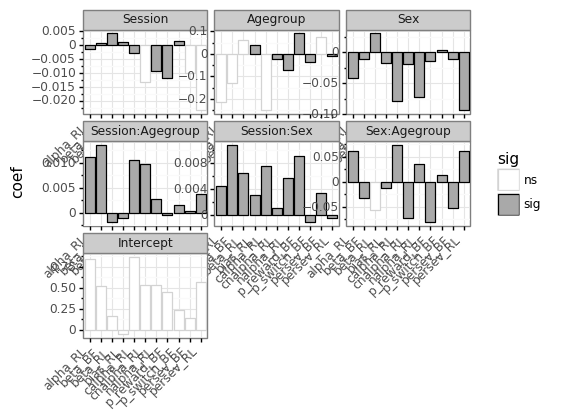

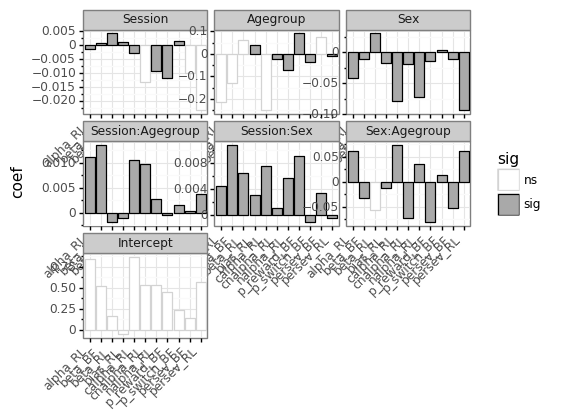

In [22]:
g = (gg.ggplot(all_models, gg.aes('param', 'coef', fill='sig', color='sig'))#, color='param'))
     + gg.geom_bar(stat='identity')
     + gg.scale_fill_manual(values=['white', 'darkgrey'])
     + gg.scale_color_manual(values=['lightgrey', 'black'])
     + gg.theme_bw()
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.labs(x='')
     + gg.facet_wrap('~ effect', scales='free')
)
g.save(os.path.join(plot_save_dir, 'RegrModels.png'))
g.draw()

# Plot all models

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 15048 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacond

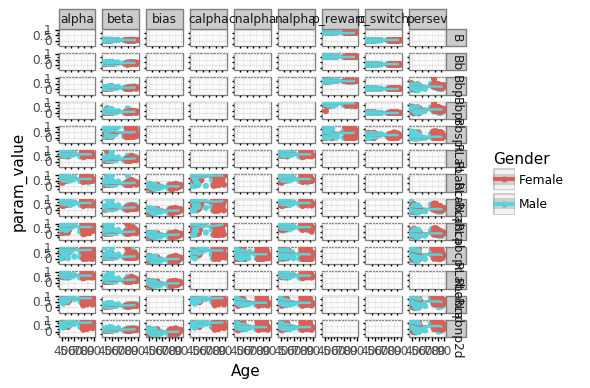

In [23]:
g = (gg.ggplot(all_params_long, gg.aes('PreciseYrs', 'param_value', color='Gender'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.facet_grid('model~param_name')
 + gg.labs(x='Age')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAge.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\stats\smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:452: PlotnineWarning: geom_point : Removed 15048 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anacond

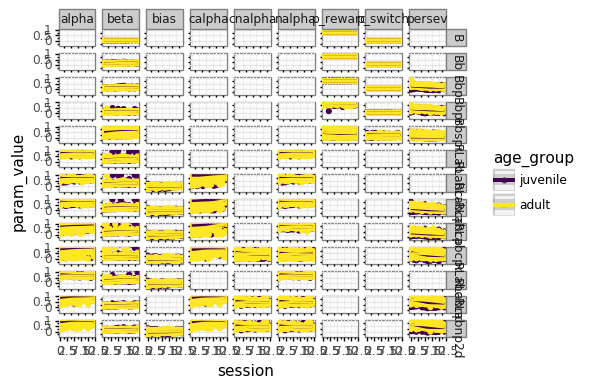

In [24]:
g = (gg.ggplot(all_params_long, gg.aes('session', 'param_value', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.geom_smooth()
 + gg.coord_cartesian(xlim=(0, 12))
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 15048 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsParamsAgegroup.png
  warn('Filename: {}'.format(filename), Plotnine

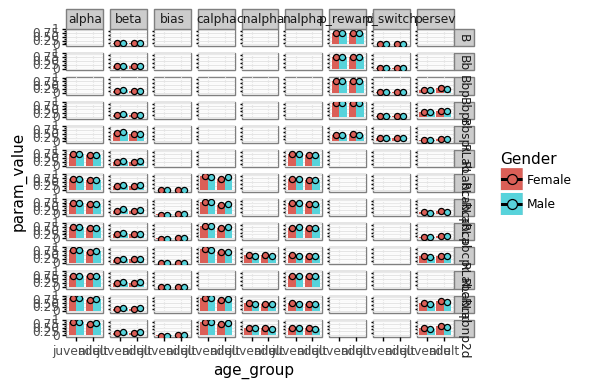

In [25]:
g = (gg.ggplot(all_params_long,
           gg.aes('age_group', 'param_value', fill='Gender'))
 + gg.stat_summary(geom='bar', position=gg.position_dodge)
 + gg.stat_summary(geom='pointrange', position=gg.position_dodge(width=0.75))
 + gg.theme_bw()
 + gg.facet_grid('model~param_name')
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsParamsAgegroup.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


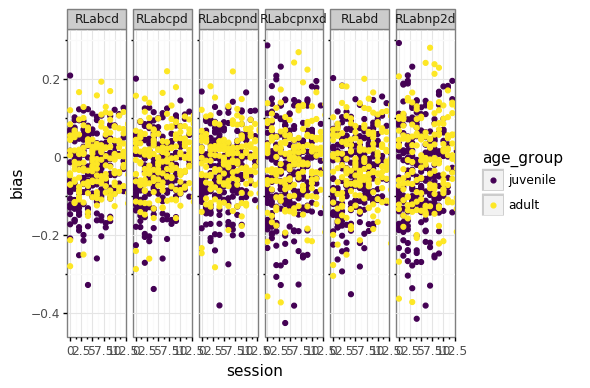

In [26]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.geom_point()
 + gg.theme_bw()
 + gg.facet_grid('~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN\models/plots/allModelsBiasSession2.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


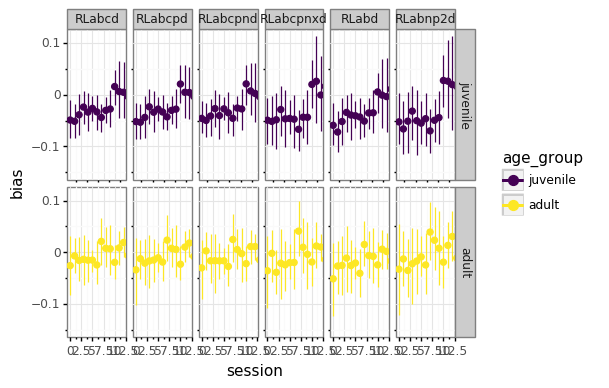

In [27]:
sub = ['d' in name for name in all_params.model]
g = (gg.ggplot(all_params[sub], gg.aes('session', 'bias', color='age_group'))
 + gg.stat_summary()
 + gg.theme_bw()
 + gg.facet_grid('age_group~model')
 + gg.coord_cartesian(xlim=(0, 12))
)
g.draw()
g.save(os.path.join(plot_save_dir, 'allModelsBiasSession2.png'))

# Gen Rec

## WSLS

In [28]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

FileNotFoundError: [Errno 2] File b'C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv' does not exist: b'C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLS_age_z_440_pymc3.csv'

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSS

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSS_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSS_age_z_401_pymc3.csv')
beta_dat = gen[['beta', 'fullID']].merge(rec[['beta', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))

In [ ]:
(gg.ggplot(beta_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

## WSLSSd

In [ ]:
gen = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/params_WSLSSd_age_z_440_pymc3.csv')
rec = pd.read_csv('C:/Users/maria/MEGAsync/SLCN/PShumanData/fitting/mice/gen_rec/params_WSLSSd_age_z_401_pymc3.csv')
param_dat = gen[['beta', 'bias', 'fullID']].merge(rec[['beta', 'bias', 'fullID']], on='fullID', suffixes=('_gen', '_rec'))
param_dat

In [ ]:
(gg.ggplot(param_dat, gg.aes('beta_gen', 'beta_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)

In [ ]:
(gg.ggplot(param_dat, gg.aes('bias_gen', 'bias_rec'))
 + gg.geom_point()
 + gg.geom_smooth()
)